In [1]:
import pandas as pd

# Load the Citi Bike dataset
file_path = "New York Citi Bike Trip Histories 2015 - 2017.csv"
df = pd.read_csv(file_path)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Function to compute descriptive statistics
def descriptive_stats(column):
    stats = {
        "Standard Deviation": column.std(),
        "Min": column.min(),
        "Q1 (Lower Quartile)": column.quantile(0.25),
        "Median (Q2)": column.median(),
        "Q3 (Upper Quartile)": column.quantile(0.75),
        "Max": column.max(),
        "IQR (Interquartile Range)": column.quantile(0.75) - column.quantile(0.25)
    }
    return stats

# Compute stats for each numeric column
summary_stats = {col: descriptive_stats(df[col]) for col in numeric_cols.columns}

# Convert to DataFrame for better readability
summary_df = pd.DataFrame(summary_stats).T

# Display results
print(summary_df)


                         Standard Deviation           Min  \
Unnamed: 0                      7679.871929      0.000000   
Trip Duration                  40638.781596     61.000000   
Start Station ID                  26.546683   3183.000000   
Start Station Latitude             0.008121     40.692640   
Start Station Longitude            0.011191    -74.096937   
End Station ID                    64.358120    147.000000   
End Station Latitude               0.095296      0.000000   
End Station Longitude              0.173044    -74.096937   
Bike ID                          753.768581  14552.000000   
Birth Year                         9.371192   1900.000000   
Gender                             0.519694      0.000000   
Trip_Duration_in_min             677.312437      1.000000   

                         Q1 (Lower Quartile)   Median (Q2)  \
Unnamed: 0                       4484.000000   9156.000000   
Trip Duration                     246.000000    383.000000   
Start Station ID    

In [2]:
import pandas as pd

# Load the Citi Bike dataset
file_path = "New York Citi Bike Trip Histories 2015 - 2017.csv"
df = pd.read_csv(file_path)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Function to compute descriptive statistics
def descriptive_stats(column):
    stats = {
        "Mode": column.mode().values[0] if not column.mode().empty else None,
        "Median": column.median(),
        "Mean": column.mean(),
        "Range": column.max() - column.min(),
        "Variance": column.var(),
        "Standard Deviation": column.std(),
        "Min": column.min(),
        "Q1 (Lower Quartile)": column.quantile(0.25),
        "Q2 (Median)": column.median(),
        "Q3 (Upper Quartile)": column.quantile(0.75),
        "Max": column.max(),
        "IQR (Interquartile Range)": column.quantile(0.75) - column.quantile(0.25)
    }
    
    # Frequency Table
    freq_table = column.value_counts().sort_index()
    normalized_freq = freq_table / freq_table.sum()
    cumulative_freq = freq_table.cumsum()
    normalized_cum_freq = cumulative_freq / cumulative_freq.max()
    
    # Store frequency-related statistics
    stats["Frequency Table"] = freq_table
    stats["Normalized Frequency"] = normalized_freq
    stats["Cumulative Frequency"] = cumulative_freq
    stats["Normalized Cumulative Frequency"] = normalized_cum_freq
    
    return stats

# Compute stats for each numeric column
summary_stats = {col: descriptive_stats(df[col]) for col in numeric_cols.columns}

# Convert to DataFrame for non-frequency values
summary_df = pd.DataFrame({col: {k: v for k, v in stats.items() if not isinstance(v, pd.Series)} for col, stats in summary_stats.items()})

# Display results
print(summary_df)

# Display Frequency Table separately (optional)
for col in numeric_cols.columns:
    print(f"\nFrequency Table for {col}:")
    print(summary_stats[col]["Frequency Table"])


                             Unnamed: 0  Trip Duration  Start Station ID  \
Mode                       0.000000e+00   2.440000e+02       3186.000000   
Median                     9.156000e+03   3.830000e+02       3202.000000   
Mean                       1.058240e+04   9.343125e+02       3206.764183   
Range                      3.414800e+04   2.026015e+07        243.000000   
Variance                   5.898043e+07   1.651511e+09        704.726385   
Standard Deviation         7.679872e+03   4.063878e+04         26.546683   
Min                        0.000000e+00   6.100000e+01       3183.000000   
Q1 (Lower Quartile)        4.484000e+03   2.460000e+02       3186.000000   
Q2 (Median)                9.156000e+03   3.830000e+02       3202.000000   
Q3 (Upper Quartile)        1.500300e+04   6.520000e+02       3211.000000   
Max                        3.414800e+04   2.026021e+07       3426.000000   
IQR (Interquartile Range)  1.051900e+04   4.060000e+02         25.000000   

           

In [3]:
# List of columns to analyze
columns_to_check = [
    "Trip Duration", "Start Time", "Stop Time", "Start Station Name", "Start Station ID",
    "Start Station Latitude", "Start Station Longitude", "End Station Name", "End Station ID",
    "End Station Latitude", "End Station Longitude", "Bike ID", "User Type", "Gender", "Birth Year"
]

# Function to calculate range
def calculate_range(column):
    if column.dtype == 'object':  # For categorical columns
        return column.nunique()  # Number of unique values
    else:  # For numerical columns
        return column.max() - column.min()

# Compute the range for each specified column
range_results = {col: calculate_range(df[col]) for col in columns_to_check}

# Convert to DataFrame and display
range_df = pd.DataFrame.from_dict(range_results, orient='index', columns=["Range"])
print(range_df)


                                Range
Trip Duration            2.026015e+07
Start Time               2.241380e+05
Stop Time                2.238360e+05
Start Station Name       5.100000e+01
Start Station ID         2.430000e+02
Start Station Latitude   5.991903e-02
Start Station Longitude  6.482840e-02
End Station Name         1.140000e+02
End Station ID           3.295000e+03
End Station Latitude     4.080134e+01
End Station Longitude    7.409694e+01
Bike ID                  1.474400e+04
User Type                2.000000e+00
Gender                   2.000000e+00
Birth Year               1.000000e+02


In [4]:
print(df.columns)



Index(['Unnamed: 0', 'Trip Duration', 'Start Time', 'Stop Time',
       'Start Station ID', 'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'Trip_Duration_in_min'],
      dtype='object')


In [5]:
# Convert Trip Duration from seconds to minutes
df["Trip Duration (minutes)"] = df["Trip Duration"] / 60

# Compute the range (Max - Min)
trip_duration_range = df["Trip Duration (minutes)"].max() - df["Trip Duration (minutes)"].min()

# Display the result
print(f"Range of Trip Duration (minutes): {trip_duration_range:.2f} minutes")


Range of Trip Duration (minutes): 337669.17 minutes


In [6]:
import pandas as pd

# Load the dataset
file_path = "New York Citi Bike Trip Histories 2015 - 2017.csv"
df = pd.read_csv(file_path)

# Function to calculate the median for each column
def calculate_median(column):
    if column.dtype == 'object':  # For categorical columns
        return column.mode().values[0] if not column.mode().empty else None
    else:  # For numerical columns
        return column.median()

# Apply the function to each column
median_results = {col: calculate_median(df[col]) for col in df.columns}

# Convert to DataFrame for better readability
median_df = pd.DataFrame.from_dict(median_results, orient='index', columns=["Median"])

# Display the result
print(median_df)


                                   Median
Unnamed: 0                         9156.0
Trip Duration                       383.0
Start Time               10/18/2015 12:47
Stop Time                10/10/2015 11:19
Start Station ID                   3202.0
Start Station Name          Grove St PATH
Start Station Latitude          40.721525
Start Station Longitude        -74.044247
End Station ID                     3199.0
End Station Name            Grove St PATH
End Station Latitude            40.721124
End Station Longitude          -74.043845
Bike ID                           24602.0
User Type                      Subscriber
Birth Year                         1982.0
Gender                                1.0
Trip_Duration_in_min                  6.0


In [7]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Function to calculate Five Number Summary and IQR
def five_number_summary(column):
    return {
        "Min": column.min(),
        "Q1 (Lower Quartile)": column.quantile(0.25),
        "Q2 (Median)": column.median(),
        "Q3 (Upper Quartile)": column.quantile(0.75),
        "Max": column.max(),
        "IQR (Interquartile Range)": column.quantile(0.75) - column.quantile(0.25)  # IQR = Q3 - Q1
    }

# Compute stats for each numeric column
summary_stats = {col: five_number_summary(df[col]) for col in numeric_cols.columns}

# Convert to DataFrame for better readability
summary_df = pd.DataFrame(summary_stats).T

# Display results
print(summary_df)


                                  Min  Q1 (Lower Quartile)   Q2 (Median)  \
Unnamed: 0                   0.000000          4484.000000   9156.000000   
Trip Duration               61.000000           246.000000    383.000000   
Start Station ID          3183.000000          3186.000000   3202.000000   
Start Station Latitude      40.692640            40.717732     40.721525   
Start Station Longitude    -74.096937           -74.050656    -74.044247   
End Station ID             147.000000          3186.000000   3199.000000   
End Station Latitude         0.000000            40.716540     40.721124   
End Station Longitude      -74.096937           -74.050444    -74.043845   
Bike ID                  14552.000000         24486.000000  24602.000000   
Birth Year                1900.000000          1975.000000   1982.000000   
Gender                       0.000000             1.000000      1.000000   
Trip_Duration_in_min         1.000000             4.000000      6.000000   

           

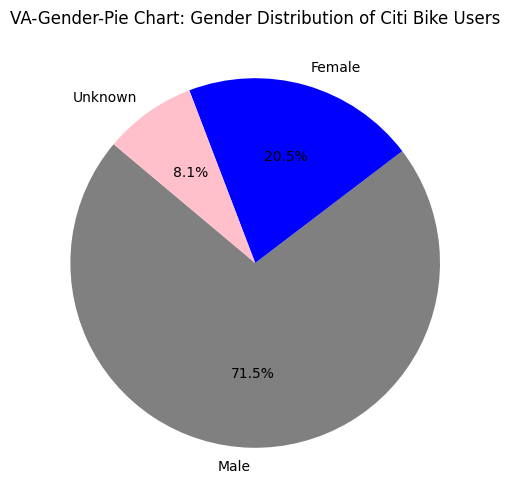

In [8]:
import matplotlib.pyplot as plt

# Mapping gender codes to labels
gender_mapping = {0: "Unknown", 1: "Male", 2: "Female"}
df["Gender"] = df["Gender"].map(gender_mapping)

# Count gender distribution
gender_counts = df["Gender"].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["gray", "blue", "pink"], startangle=140)
plt.title("VA-Gender-Pie Chart: Gender Distribution of Citi Bike Users")
plt.show()


C:\Users\dulak\AppData\Local\Temp\ipykernel_21252\2926626065.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="User Type")


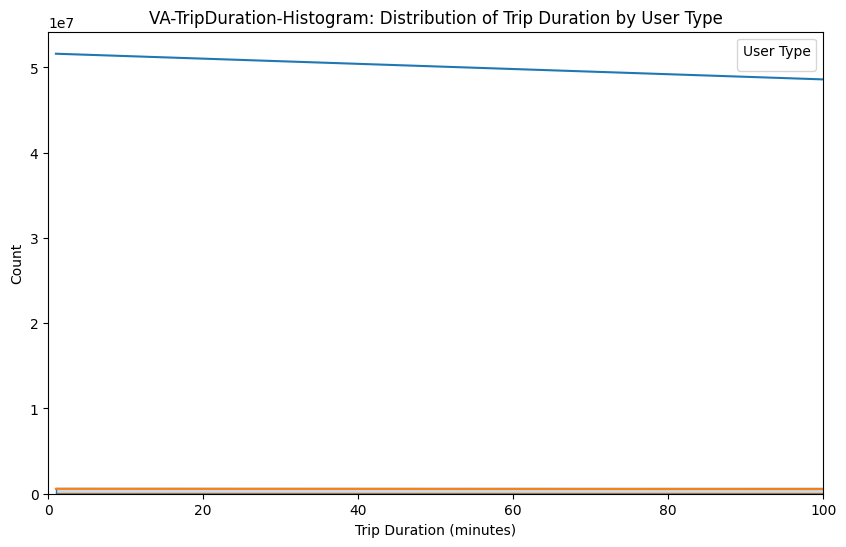

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for trip duration by user type
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Trip_Duration_in_min", hue="User Type", bins=50, kde=True, element="step", common_norm=False)
plt.xlim(0, 100)  # Limiting to 100 minutes for better visibility
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Count")
plt.title("VA-TripDuration-Histogram: Distribution of Trip Duration by User Type")
plt.legend(title="User Type")
plt.show()


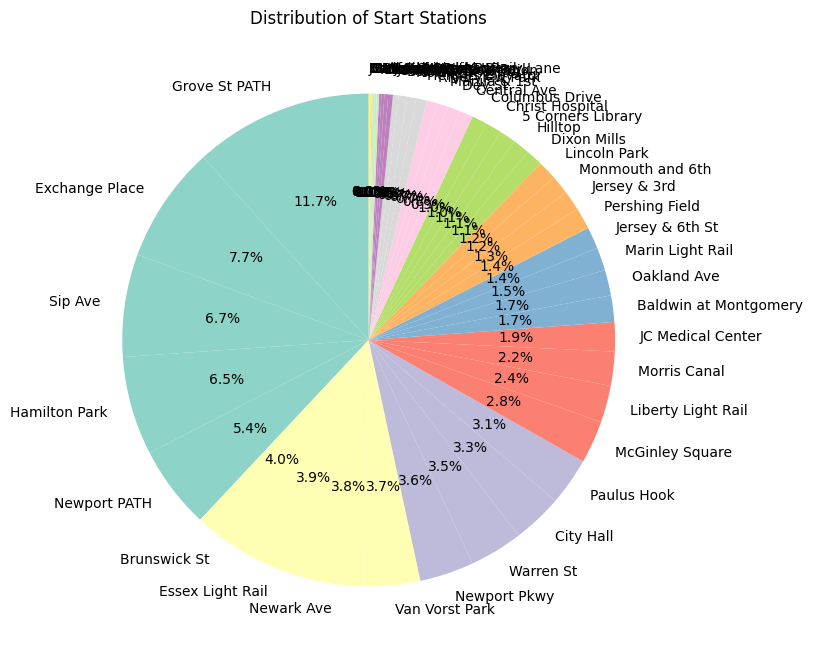

In [10]:
import matplotlib.pyplot as plt

# Pie chart for Start Station Name
start_station_counts = df['Start Station Name'].value_counts()
plt.figure(figsize=(8, 8))
start_station_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Start Stations')
plt.ylabel('')
plt.show()



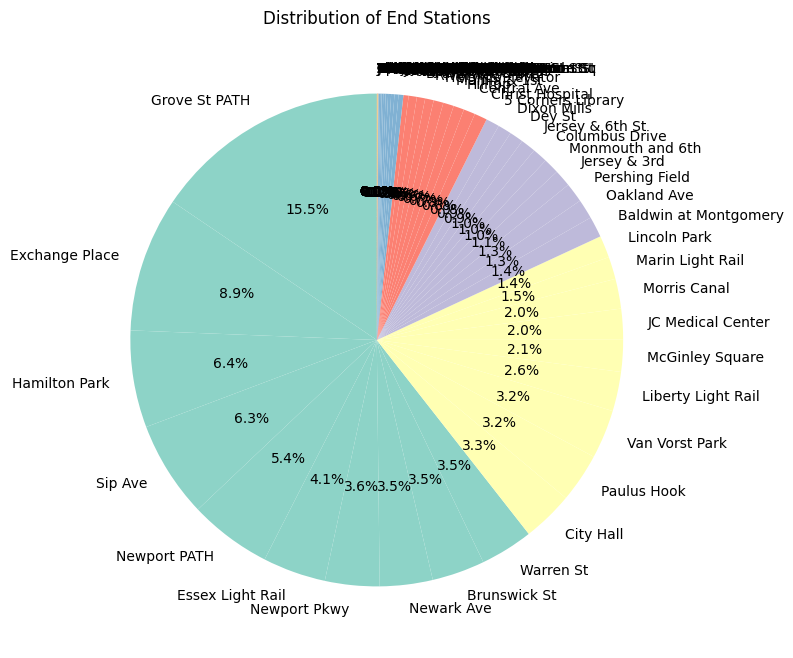

In [11]:
# Pie chart for End Station Name
end_station_counts = df['End Station Name'].value_counts()
plt.figure(figsize=(8, 8))
end_station_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of End Stations')
plt.ylabel('')
plt.show()




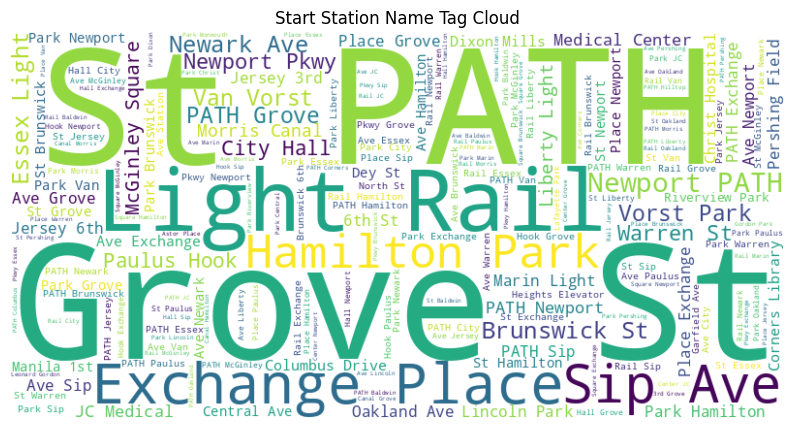

In [12]:
from wordcloud import WordCloud

# Tag cloud for Start Station Name
start_station_text = ' '.join(df['Start Station Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(start_station_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Start Station Name Tag Cloud')
plt.show()


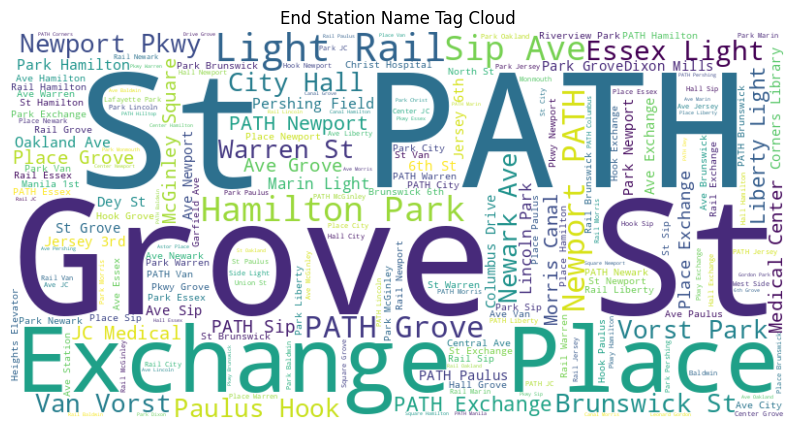

In [13]:
# Tag cloud for End Station Name
end_station_text = ' '.join(df['End Station Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(end_station_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('End Station Name Tag Cloud')
plt.show()


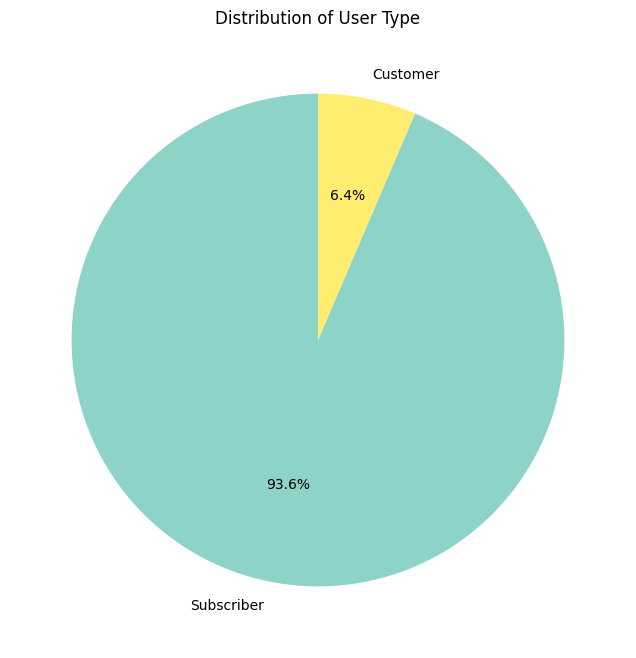

In [14]:
# Pie chart for User Type
user_type_counts = df['User Type'].value_counts()
plt.figure(figsize=(8, 8))
user_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of User Type')
plt.ylabel('')
plt.show()


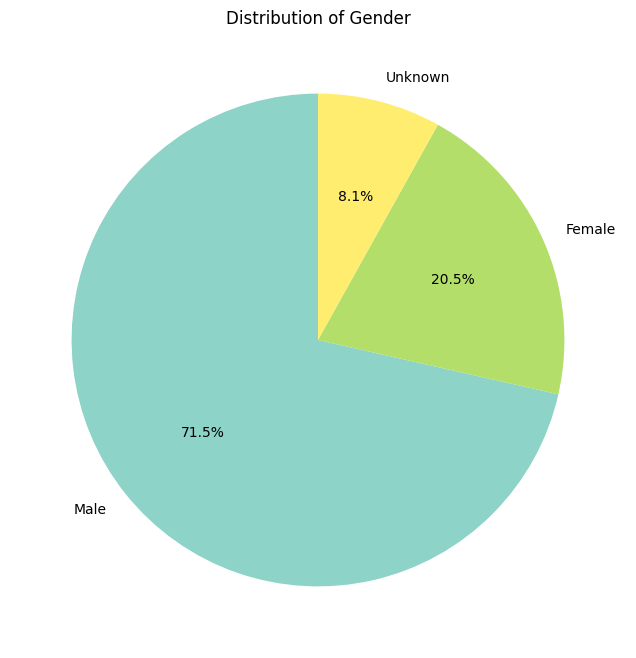

In [15]:
# Pie chart for Gender
gender_counts = df['Gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
gender_counts = gender_counts.rename(index=gender_labels)
plt.figure(figsize=(8, 8))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()


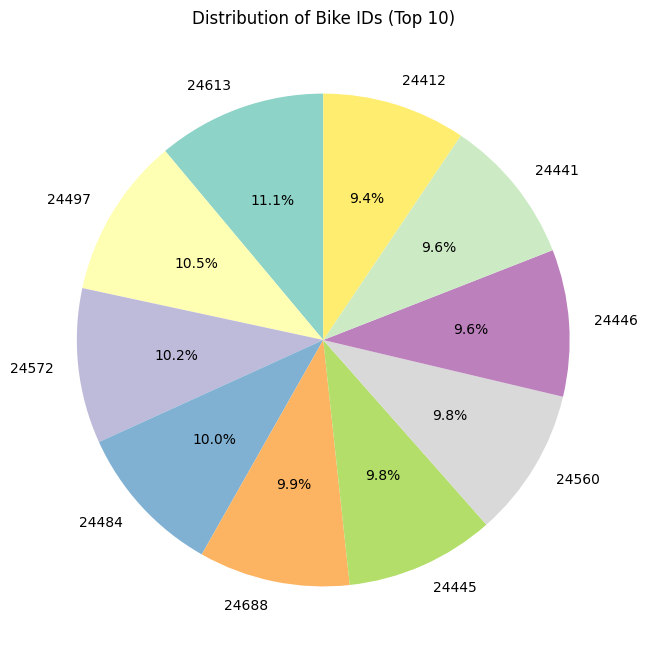

In [16]:
# Pie chart for Bike ID (taking a sample if there are many unique values)
bike_id_counts = df['Bike ID'].value_counts().head(10)  # Limiting to top 10 to avoid clutter
plt.figure(figsize=(8, 8))
bike_id_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Bike IDs (Top 10)')
plt.ylabel('')
plt.show()


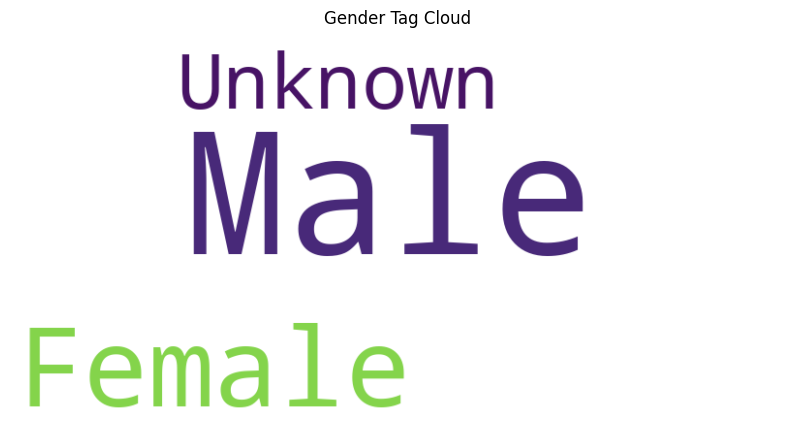

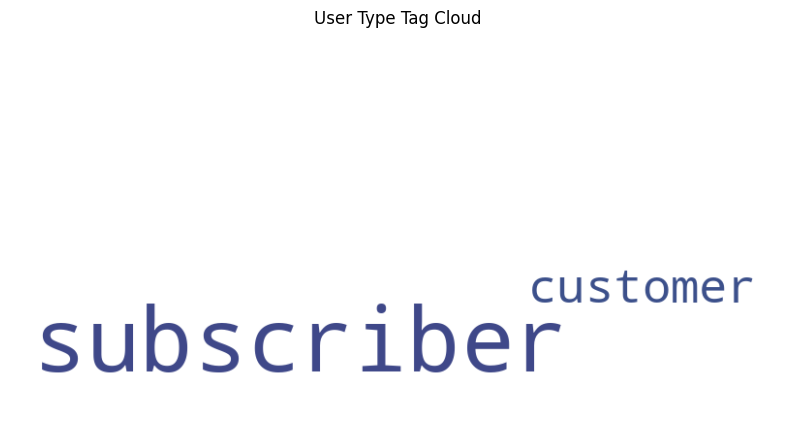

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# ✅ Step 1: Map Gender values correctly
gender_mapping = {0: 'Unknown', 1: 'Male', 2: 'Female'}
df['Gender'] = df['Gender'].map(gender_mapping)

# ✅ Step 2: Normalize User Type
df['User Type'] = df['User Type'].astype(str).str.lower().str.strip()

# ✅ Step 3: Generate Frequency Data
gender_counts = Counter(df['Gender'].dropna())
user_counts = Counter(df['User Type'].dropna())

# ✅ Step 4: Generate Word Clouds
wordcloud_gender = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(gender_counts)
wordcloud_user = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(user_counts)

# ✅ Step 5: Plot Gender Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_gender, interpolation='bilinear')
plt.axis('off')
plt.title('Gender Tag Cloud')
plt.show()

# ✅ Step 6: Plot User Type Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_user, interpolation='bilinear')
plt.axis('off')
plt.title('User Type Tag Cloud')
plt.show()


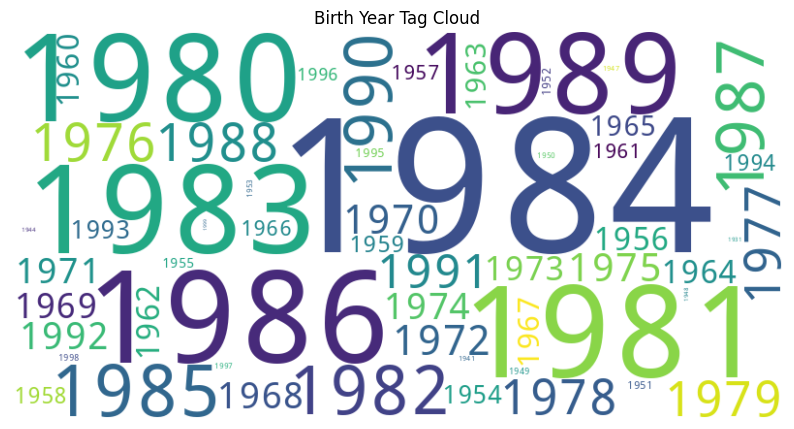

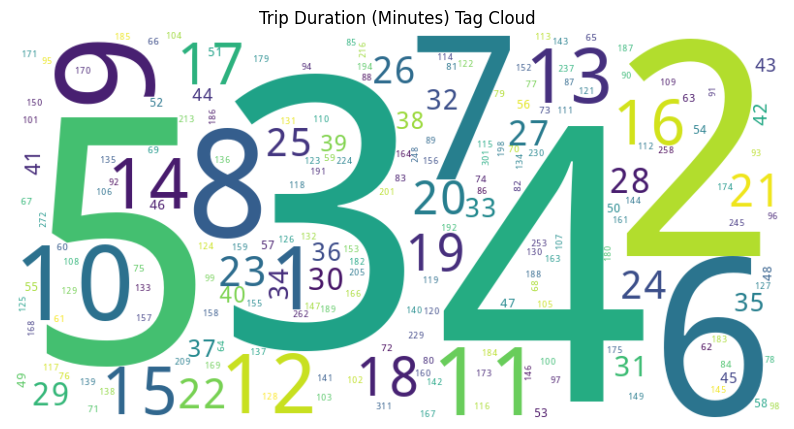

In [18]:
# ✅ Step 1: Convert Birth Year to String (Remove NaNs)
if 'Birth Year' in df.columns:
    df['Birth Year'] = df['Birth Year'].dropna().astype(int).astype(str)  # Convert float to int then string

# ✅ Step 2: Convert Trip Duration from Seconds to Minutes (if applicable)
if 'Trip Duration' in df.columns:
    df['Trip Duration'] = (df['Trip Duration'] / 60).astype(int)  # Convert to minutes

# ✅ Step 3: Generate Frequency Data
if 'Birth Year' in df.columns:
    birth_year_counts = Counter(df['Birth Year'].dropna())
    wordcloud_birth_year = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(birth_year_counts)

if 'Trip Duration' in df.columns:
    # Convert Trip Duration to string for word cloud generation
    duration_counts = Counter(df['Trip Duration'].dropna().astype(str))  # Convert to string
    wordcloud_duration = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(duration_counts)

# ✅ Step 4: Plot Birth Year Word Cloud
if 'Birth Year' in df.columns:
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_birth_year, interpolation='bilinear')
    plt.axis('off')
    plt.title('Birth Year Tag Cloud')
    plt.show()

# ✅ Step 5: Plot Trip Duration Word Cloud
if 'Trip Duration' in df.columns:
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_duration, interpolation='bilinear')
    plt.axis('off')
    plt.title('Trip Duration (Minutes) Tag Cloud')
    plt.show()


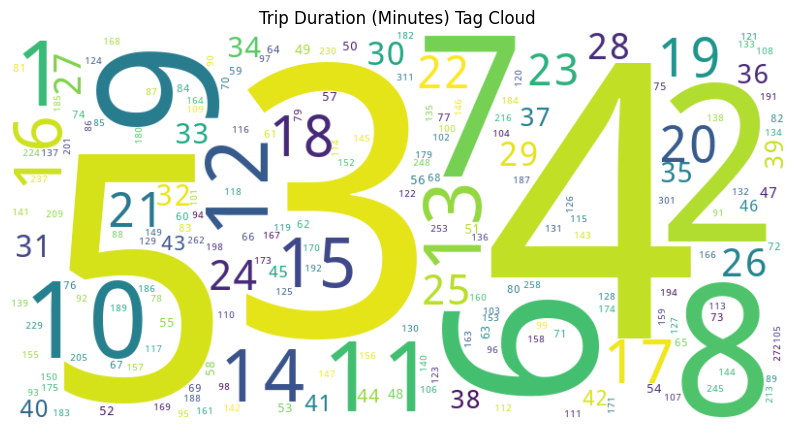

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# ✅ Step 1: Convert Birth Year to String (Remove NaNs)
if 'Birth Year' in df.columns:
    df['Birth Year'] = df['Birth Year'].dropna().astype(int).astype(str)  # Convert float to int then string

# ✅ Step 2: Convert Trip Duration from Seconds to Minutes (if applicable)
if 'Trip Duration' in df.columns:
    df['Trip Duration'] = (df['Trip Duration'] / 60).astype(int)  # Convert to minutes

# ✅ Step 3: Generate Frequency Data for Trip Duration
if 'Trip Duration' in df.columns:
    duration_counts = Counter(df['Trip Duration'].dropna().astype(str))  # Convert to string
    wordcloud_duration = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(duration_counts)

# ✅ Step 4: Plot Trip Duration Word Cloud
if 'Trip Duration' in df.columns:
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_duration, interpolation='bilinear')
    plt.axis('off')
    plt.title('Trip Duration (Minutes) Tag Cloud')
    plt.show()


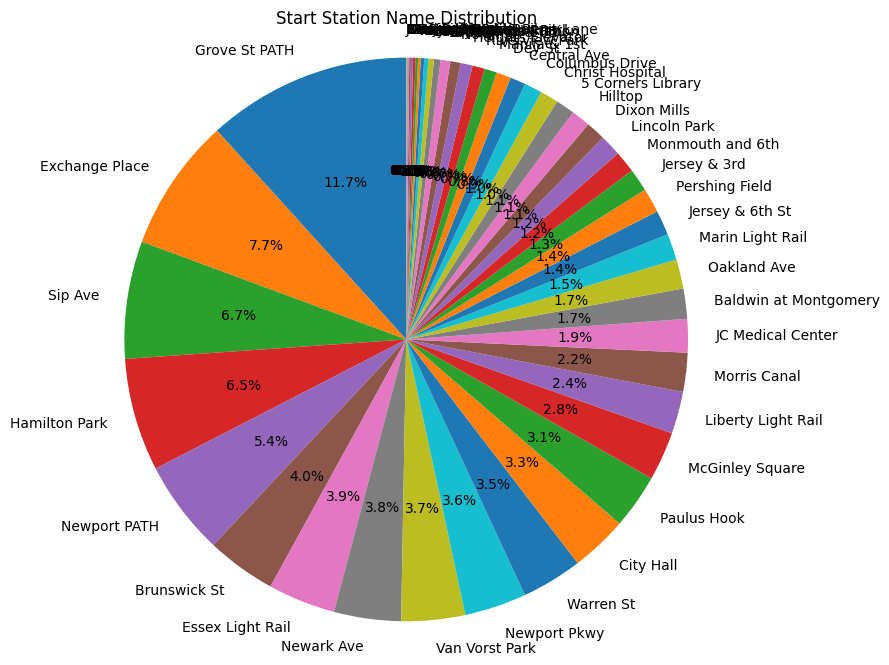

In [20]:
# Start Station Name Pie Chart
if 'Start Station Name' in df.columns:
    start_station_name_counts = df['Start Station Name'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(start_station_name_counts, labels=start_station_name_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Start Station Name Distribution')
    plt.axis('equal')
    plt.show()

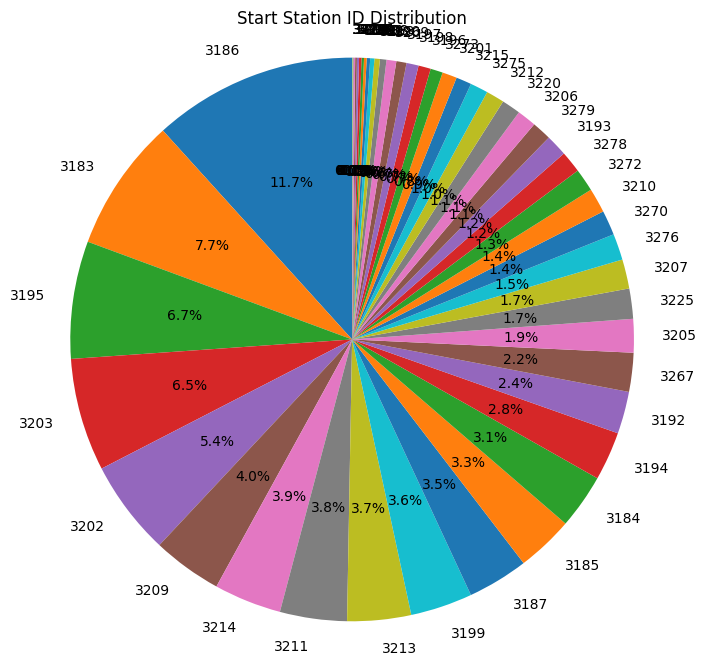

In [21]:
# Start Station ID Pie Chart
if 'Start Station ID' in df.columns:
    start_station_id_counts = df['Start Station ID'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(start_station_id_counts, labels=start_station_id_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Start Station ID Distribution')
    plt.axis('equal')
    plt.show()

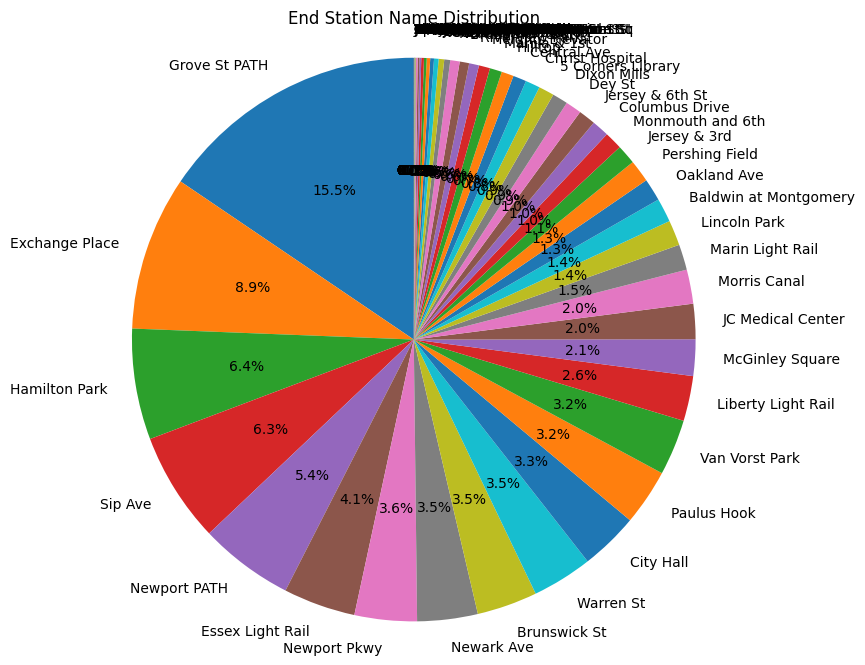

In [22]:
# End Station Name Pie Chart
if 'End Station Name' in df.columns:
    end_station_name_counts = df['End Station Name'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(end_station_name_counts, labels=end_station_name_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('End Station Name Distribution')
    plt.axis('equal')
    plt.show()

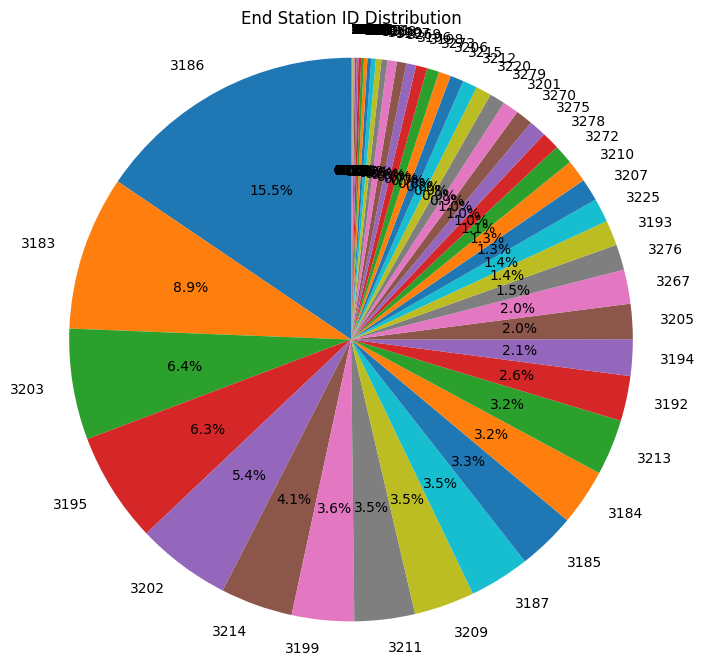

In [23]:
# End Station ID Pie Chart
if 'End Station ID' in df.columns:
    end_station_id_counts = df['End Station ID'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(end_station_id_counts, labels=end_station_id_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('End Station ID Distribution')
    plt.axis('equal')
    plt.show()

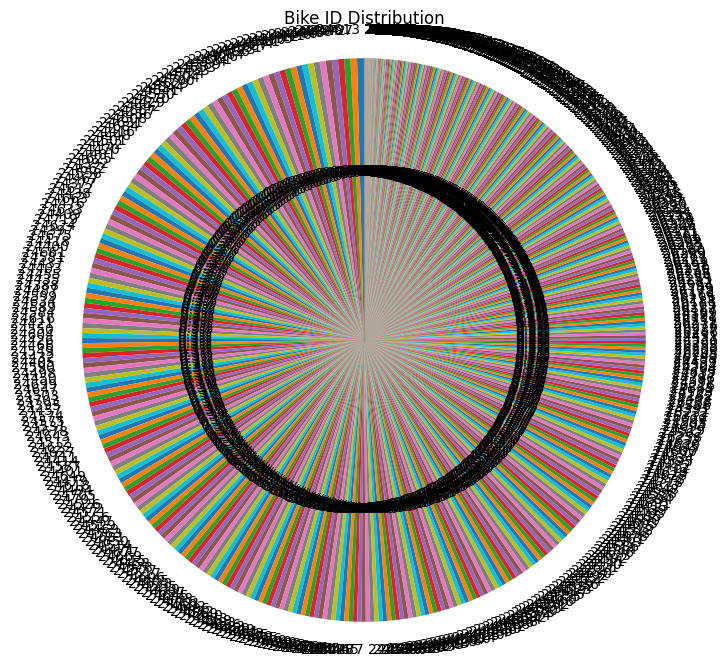

In [24]:
# Bike ID Pie Chart
if 'Bike ID' in df.columns:
    bike_id_counts = df['Bike ID'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(bike_id_counts, labels=bike_id_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Bike ID Distribution')
    plt.axis('equal')
    plt.show()


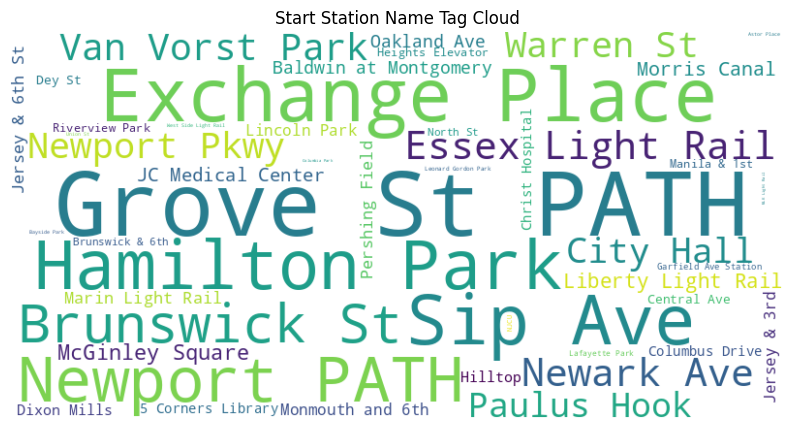

In [25]:
# Start Station Name Word Cloud
if 'Start Station Name' in df.columns:
    start_station_name_counts = Counter(df['Start Station Name'].dropna())
    wordcloud_start_station_name = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(start_station_name_counts)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_start_station_name, interpolation='bilinear')
    plt.axis('off')
    plt.title('Start Station Name Tag Cloud')
    plt.show()


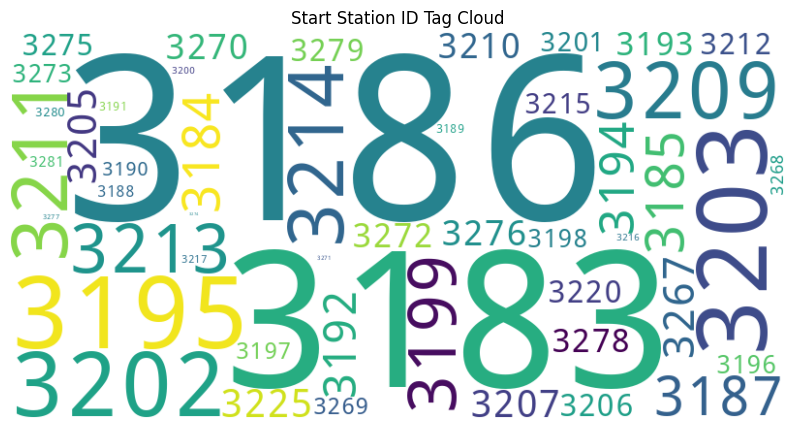

In [26]:
# Start Station ID Word Cloud
if 'Start Station ID' in df.columns:
    start_station_id_counts = Counter(df['Start Station ID'].dropna().astype(str))  # Convert to string for word cloud
    wordcloud_start_station_id = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(start_station_id_counts)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_start_station_id, interpolation='bilinear')
    plt.axis('off')
    plt.title('Start Station ID Tag Cloud')
    plt.show()


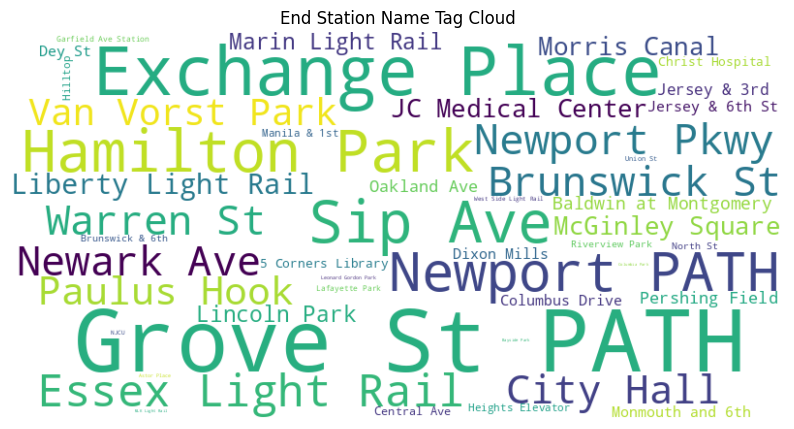

In [27]:
# End Station Name Word Cloud
if 'End Station Name' in df.columns:
    end_station_name_counts = Counter(df['End Station Name'].dropna())
    wordcloud_end_station_name = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(end_station_name_counts)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_end_station_name, interpolation='bilinear')
    plt.axis('off')
    plt.title('End Station Name Tag Cloud')
    plt.show()


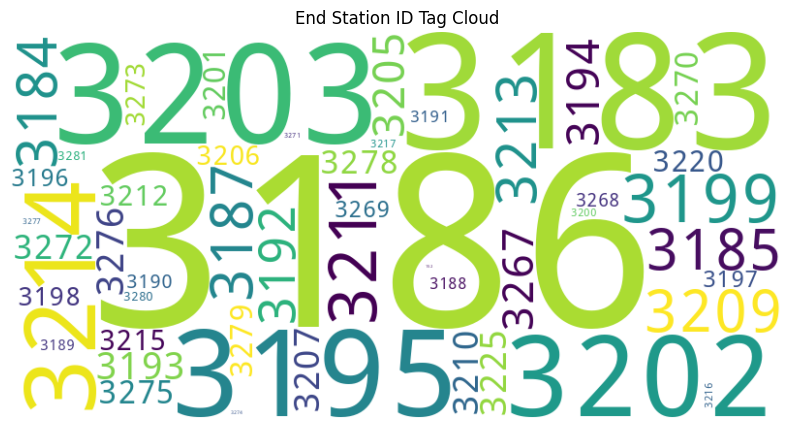

In [28]:
# End Station ID Word Cloud
if 'End Station ID' in df.columns:
    end_station_id_counts = Counter(df['End Station ID'].dropna().astype(str))  # Convert to string for word cloud
    wordcloud_end_station_id = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(end_station_id_counts)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_end_station_id, interpolation='bilinear')
    plt.axis('off')
    plt.title('End Station ID Tag Cloud')
    plt.show()

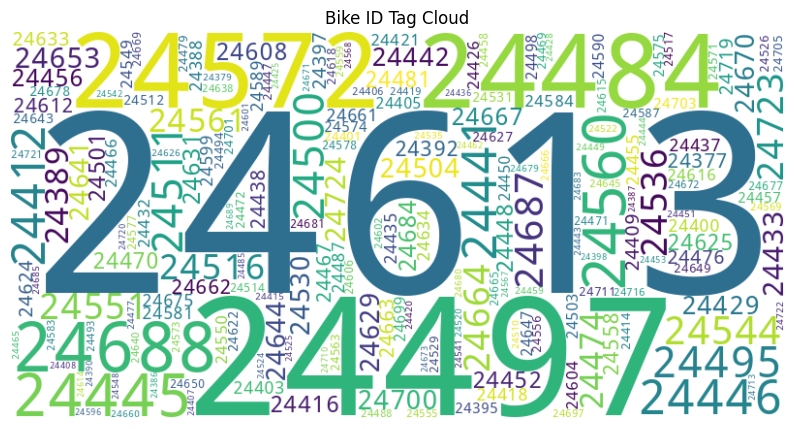

In [29]:
# Bike ID Word Cloud
if 'Bike ID' in df.columns:
    bike_id_counts = Counter(df['Bike ID'].dropna().astype(str))  # Convert to string for word cloud
    wordcloud_bike_id = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bike_id_counts)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_bike_id, interpolation='bilinear')
    plt.axis('off')
    plt.title('Bike ID Tag Cloud')
    plt.show()


In [30]:
import pandas as pd

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# Summary statistics
numerical_columns = ['Trip Duration', 'Start Station ID', 'End Station ID', 'Bike ID', 'Birth Year']
numerical_summary = df[numerical_columns].describe()

# Display summary statistics
print(numerical_summary)


       Trip Duration  Start Station ID  End Station ID        Bike ID  \
count   7.355020e+05     735502.000000   735502.000000  735502.000000   
mean    9.343125e+02       3206.764183     3203.387325   24914.009133   
std     4.063878e+04         26.546683       64.358120     753.768581   
min     6.100000e+01       3183.000000      147.000000   14552.000000   
25%     2.460000e+02       3186.000000     3186.000000   24486.000000   
50%     3.830000e+02       3202.000000     3199.000000   24602.000000   
75%     6.520000e+02       3211.000000     3211.000000   24711.000000   
max     2.026021e+07       3426.000000     3442.000000   29296.000000   

          Birth Year  
count  735502.000000  
mean     1979.544239  
std         9.371192  
min      1900.000000  
25%      1975.000000  
50%      1982.000000  
75%      1986.000000  
max      2000.000000  


In [31]:
print(df.columns)


Index(['Unnamed: 0', 'Trip Duration', 'Start Time', 'Stop Time',
       'Start Station ID', 'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'Trip_Duration_in_min'],
      dtype='object')


In [32]:
import pandas as pd

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# Ensure column names are consistent
df.columns = df.columns.str.strip()  # Remove extra spaces

# Filter one-way trips (where start station ≠ end station)
one_way_trips = df[df['Start Station Name'] != df['End Station Name']]

# Count the most frequently used start stations for one-way trips
top_stations = one_way_trips['Start Station Name'].value_counts().head(2)

# Display the results
print("Top two stations used for one-way trips:")
print(top_stations)


Top two stations used for one-way trips:
Start Station Name
Grove St PATH     84304
Exchange Place    53947
Name: count, dtype: int64


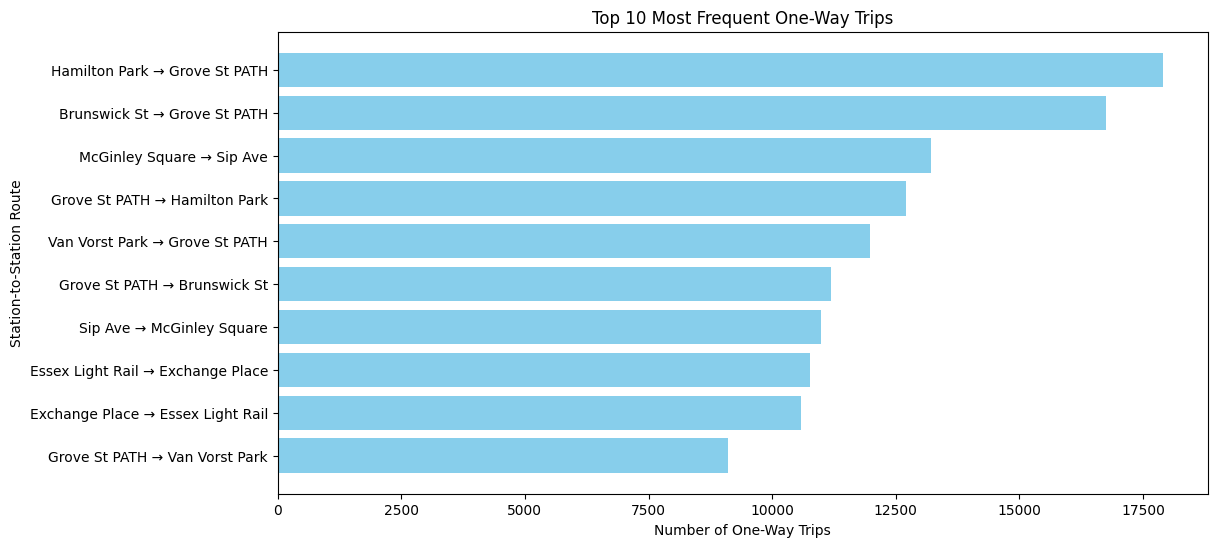

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Filter one-way trips (Start Station ≠ End Station)
one_way_trips = df[df['Start Station Name'] != df['End Station Name']]

# Count one-way trip frequencies (Start Station → End Station)
one_way_counts = one_way_trips.groupby(['Start Station Name', 'End Station Name']).size().reset_index(name='Trip Count')

# Get the top 10 most frequent one-way trips
top_one_way_trips = one_way_counts.nlargest(10, 'Trip Count')

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_one_way_trips.apply(lambda x: f"{x['Start Station Name']} → {x['End Station Name']}", axis=1), 
         top_one_way_trips['Trip Count'], color='skyblue')

plt.xlabel('Number of One-Way Trips')
plt.ylabel('Station-to-Station Route')
plt.title('Top 10 Most Frequent One-Way Trips')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Filter one-way trips (Start Station ≠ End Station)
one_way_trips = df[df['Start Station Name'] != df['End Station Name']]

# Count the most frequent start stations for one-way trips
top_start_stations = one_way_trips['Start Station Name'].value_counts().head(10)

# Display the results
print("Top 10 most frequently used start stations for one-way trips:")
print(top_start_stations)


Top 10 most frequently used start stations for one-way trips:
Start Station Name
Grove St PATH       84304
Exchange Place      53947
Sip Ave             48638
Hamilton Park       45129
Newport PATH        38236
Brunswick St        28550
Newark Ave          27217
Essex Light Rail    26611
Van Vorst Park      25466
Warren St           24288
Name: count, dtype: int64


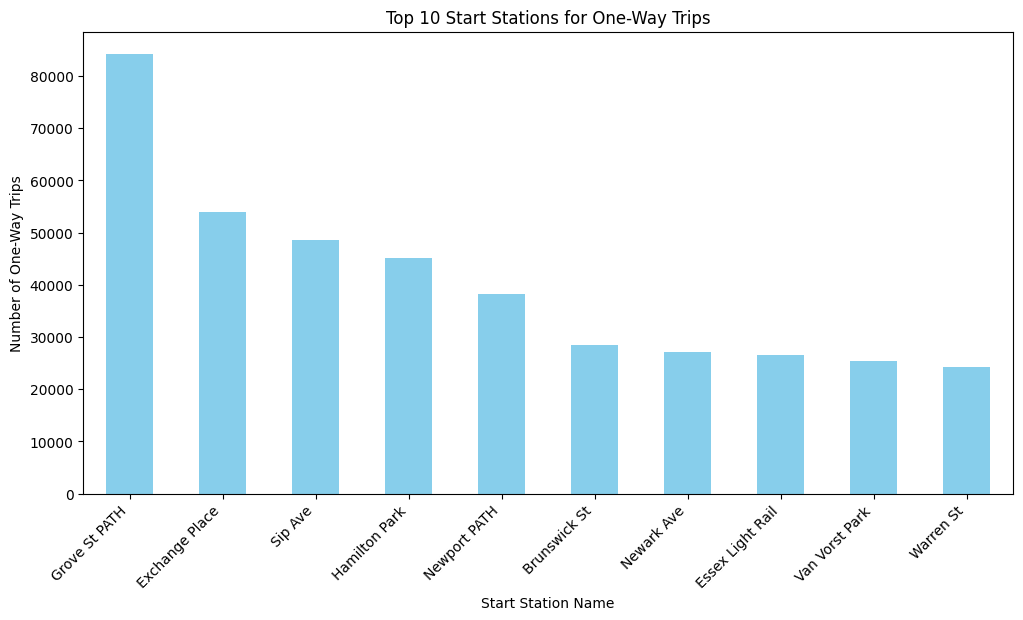

In [35]:
# Plot a bar chart for the most frequently used start stations in one-way trips
plt.figure(figsize=(12, 6))
top_start_stations.plot(kind='bar', color='skyblue')

plt.xlabel('Start Station Name')
plt.ylabel('Number of One-Way Trips')
plt.title('Top 10 Start Stations for One-Way Trips')
plt.xticks(rotation=45, ha='right')
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Filter one-way trips (Start Station ≠ End Station)
one_way_trips = df[df['Start Station Name'] != df['End Station Name']]

# Count the most frequent stations in one-way trips (both start & end)
start_counts = one_way_trips['Start Station Name'].value_counts()
end_counts = one_way_trips['End Station Name'].value_counts()

# Combine counts for overall frequency
total_station_counts = (start_counts + end_counts).fillna(0)

# Sort to get the top 10 stations
top_stations = total_station_counts.sort_values(ascending=False).head(10)

# Display results
print("Top 10 most frequently used stations for one-way trips:")
print(top_stations)


Top 10 most frequently used stations for one-way trips:
Grove St PATH       196601.0
Exchange Place      116766.0
Sip Ave              94274.0
Hamilton Park        89450.0
Newport PATH         76237.0
Essex Light Rail     55196.0
Brunswick St         53247.0
Newark Ave           51679.0
Warren St            48419.0
Van Vorst Park       47622.0
Name: count, dtype: float64


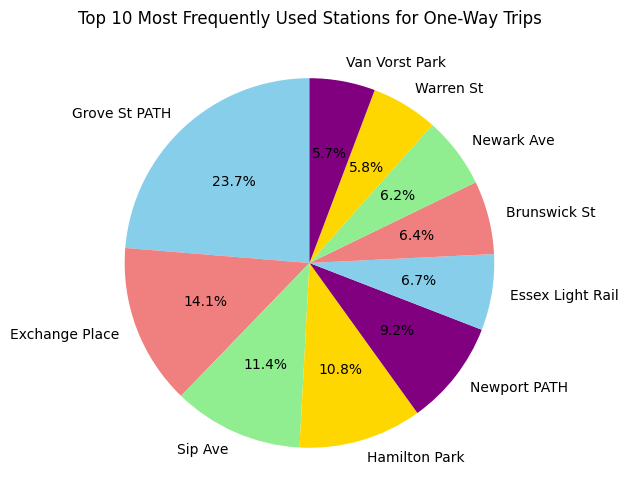

In [37]:
# Plot a pie chart
plt.figure(figsize=(10, 6))
top_stations.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple'], startangle=90)

plt.ylabel('')
plt.title('Top 10 Most Frequently Used Stations for One-Way Trips')
plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'New York Citi Bike Trip Histories 2015 - 2017.csv'
df = pd.read_csv(file_path)

# Convert 'Start Time and Date' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')

# Extract year
df['Year'] = df['Start Time'].dt.year

# Count trips per year
yearly_trips = df['Year'].value_counts().sort_index()

# Display yearly trip counts
print("Number of trips per year:")
print(yearly_trips)


Number of trips per year:
Year
2015    137626
2016    495168
2017    102708
Name: count, dtype: int64


In [39]:
print(df.columns)


Index(['Unnamed: 0', 'Trip Duration', 'Start Time', 'Stop Time',
       'Start Station ID', 'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'Trip_Duration_in_min', 'Year'],
      dtype='object')


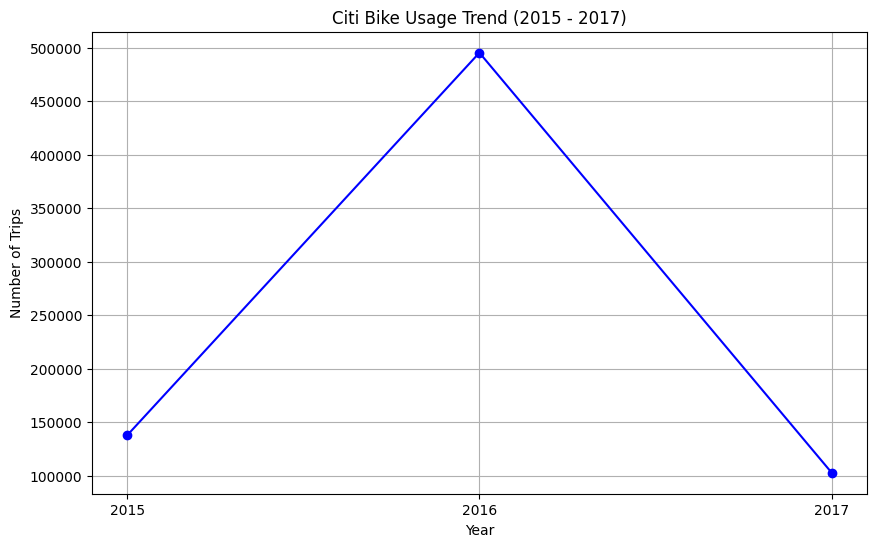

In [40]:
# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_trips.index, yearly_trips.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.title('Citi Bike Usage Trend (2015 - 2017)')
plt.xticks(yearly_trips.index)
plt.grid(True)
plt.show()


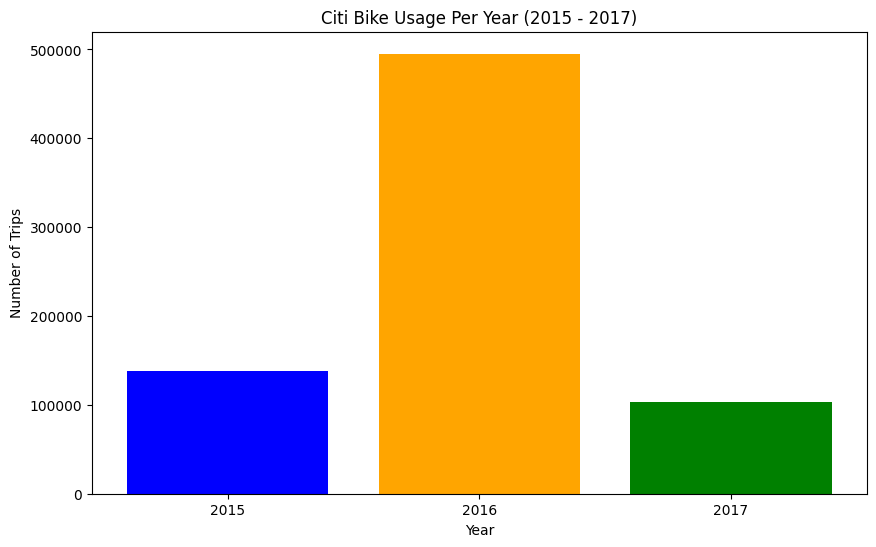

In [41]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_trips.index, yearly_trips.values, color=['blue', 'orange', 'green'])

plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.title('Citi Bike Usage Per Year (2015 - 2017)')
plt.xticks(yearly_trips.index)
plt.show()
